# IMDB Review Classification with implementation of regularization

In [2]:
from tensorflow import keras

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Regularization
Regularization is a key concept of neural networks and will be the focus of this notebook 

## What is Regularization?
Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model's performance on the unseen data. <br>
The main goal of regularization is to reduce overfitting as much as we can <br>

### So then what is overfitting and what is generalising?
**Generalization**
Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning. <br>

The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows us to make predictions in the future on data the model has never seen <br>

**Overfitting** <br>
Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

# Reducing Overfitting
## Network Size
The great thing about deep networks is the bigger we make the data set our model continues to improve, however obviously we reach a cut off point in what the network is able to learn. <br>
A model is able to overfit because it has the size or capacity to do so, thus if we reduce the size of our Network we reduce its capacity and as a result there is less chance of overfitting.  <br>
Network Size is very important to the success of a model and we simply experiment with the number of layers and params until we are satisfied we have reached a good balance.  <br>

### Network Size vs Validation Loss

In [6]:
from keras import models
from keras import layers
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 15s 616us/step - loss: 0.4436 - acc: 0.8192 - val_loss: 0.3279 - val_acc: 0.8815
Epoch 2/20
25000/25000 [==============================] - 5s 198us/step - loss: 0.2549 - acc: 0.9087 - val_loss: 0.2839 - val_acc: 0.8896
Epoch 3/20
25000/25000 [==============================] - 4s 179us/step - loss: 0.1989 - acc: 0.9282 - val_loss: 0.2854 - val_acc: 0.8861
Epoch 4/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.1629 - acc: 0.9420 - val_loss: 0.3363 - val_acc: 0.8674
Epoch 5/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.1419 - acc: 0.9498 - val_loss: 0.3308 - val_acc: 0.8728
Epoch 6/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.1207 - acc: 0.9592 - val_loss: 0.3398 - val_acc: 0.8735
Epoch 7/20
25000/25000 [==============================] - 4s 177us/step - loss: 0.1036 - acc: 0.9659 - val_loss: 0.3610 

In [7]:
small_1_model = models.Sequential()
small_1_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
small_1_model.add(layers.Dense(4, activation='relu'))
small_1_model.add(layers.Dense(1, activation='sigmoid'))

small_1_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [8]:
small_1_model_hist = small_1_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.6163 - acc: 0.6721 - val_loss: 0.5629 - val_acc: 0.8070
Epoch 2/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.5076 - acc: 0.8391 - val_loss: 0.4848 - val_acc: 0.8388
Epoch 3/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.4202 - acc: 0.8924 - val_loss: 0.4114 - val_acc: 0.8668
Epoch 4/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.3346 - acc: 0.9160 - val_loss: 0.3486 - val_acc: 0.8824
Epoch 5/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.2683 - acc: 0.9283 - val_loss: 0.3087 - val_acc: 0.8888
Epoch 6/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.2244 - acc: 0.9338 - val_loss: 0.2891 - val_acc: 0.8900
Epoch 7/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.1949 - acc: 0.9396 - val_loss: 0.2826 - 

In [9]:
small_2_model = models.Sequential()
small_2_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
small_2_model.add(layers.Dense(8, activation='relu'))
small_2_model.add(layers.Dense(1, activation='sigmoid'))

small_2_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [10]:
small_2_model_hist = small_2_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.5048 - acc: 0.8183 - val_loss: 0.4015 - val_acc: 0.8675
Epoch 2/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.3135 - acc: 0.9000 - val_loss: 0.3144 - val_acc: 0.8824
Epoch 3/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2370 - acc: 0.9185 - val_loss: 0.3024 - val_acc: 0.8777
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1966 - acc: 0.9316 - val_loss: 0.2783 - val_acc: 0.8891
Epoch 5/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.1701 - acc: 0.9410 - val_loss: 0.2863 - val_acc: 0.8862
Epoch 6/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.1498 - acc: 0.9498 - val_loss: 0.3212 - val_acc: 0.8745
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1337 - acc: 0.9552 - val_loss: 0.3086 - 

In [11]:
big_1_model = models.Sequential()
big_1_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
big_1_model.add(layers.Dense(64, activation='relu'))
big_1_model.add(layers.Dense(64, activation='relu'))
big_1_model.add(layers.Dense(1, activation='sigmoid'))

big_1_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [12]:
big_1_model_hist = big_1_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 207us/step - loss: 0.4220 - acc: 0.8066 - val_loss: 0.3461 - val_acc: 0.8528
Epoch 2/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.2326 - acc: 0.9071 - val_loss: 0.2814 - val_acc: 0.8878
Epoch 3/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.1756 - acc: 0.9323 - val_loss: 0.3256 - val_acc: 0.8688
Epoch 4/20
25000/25000 [==============================] - 4s 178us/step - loss: 0.1290 - acc: 0.9512 - val_loss: 0.3625 - val_acc: 0.8733
Epoch 5/20
25000/25000 [==============================] - 5s 205us/step - loss: 0.0942 - acc: 0.9648 - val_loss: 0.5147 - val_acc: 0.8428
Epoch 6/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.0652 - acc: 0.9757 - val_loss: 0.6885 - val_acc: 0.8254
Epoch 7/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.0557 - acc: 0.9834 - val_loss: 0.5364 - 

In [13]:
big_2_model = models.Sequential()
big_2_model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
big_2_model.add(layers.Dense(128, activation='relu'))
big_2_model.add(layers.Dense(128, activation='relu'))
big_2_model.add(layers.Dense(128, activation='relu'))
big_2_model.add(layers.Dense(1, activation='sigmoid'))

big_2_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [14]:
big_2_model_hist = big_2_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 300us/step - loss: 0.4422 - acc: 0.8010 - val_loss: 0.3148 - val_acc: 0.8709
Epoch 2/20
25000/25000 [==============================] - 6s 244us/step - loss: 0.2306 - acc: 0.9083 - val_loss: 0.3239 - val_acc: 0.8702
Epoch 3/20
25000/25000 [==============================] - 6s 240us/step - loss: 0.1588 - acc: 0.9368 - val_loss: 0.3545 - val_acc: 0.8804
Epoch 4/20
25000/25000 [==============================] - 6s 251us/step - loss: 0.1076 - acc: 0.9582 - val_loss: 0.3661 - val_acc: 0.8798
Epoch 5/20
25000/25000 [==============================] - 6s 238us/step - loss: 0.0572 - acc: 0.9823 - val_loss: 0.5577 - val_acc: 0.8731
Epoch 6/20
25000/25000 [==============================] - 6s 238us/step - loss: 0.0608 - acc: 0.9891 - val_loss: 0.6323 - val_acc: 0.8756
Epoch 7/20
25000/25000 [==============================] - 6s 245us/step - loss: 0.0808 - acc: 0.9899 - val_loss: 0.5598 - 

In [15]:
big_3_model = models.Sequential()
big_3_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
big_3_model.add(layers.Dense(512, activation='relu'))
big_3_model.add(layers.Dense(512, activation='relu'))
big_3_model.add(layers.Dense(512, activation='relu'))
big_3_model.add(layers.Dense(512, activation='relu'))
big_3_model.add(layers.Dense(1, activation='sigmoid'))

big_3_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [16]:
big_3_model_hist = big_3_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 19s 744us/step - loss: 0.5336 - acc: 0.7735 - val_loss: 0.3231 - val_acc: 0.8747
Epoch 2/20
25000/25000 [==============================] - 17s 691us/step - loss: 0.2499 - acc: 0.9015 - val_loss: 0.2863 - val_acc: 0.8885
Epoch 3/20
25000/25000 [==============================] - 17s 661us/step - loss: 0.1483 - acc: 0.9481 - val_loss: 0.5313 - val_acc: 0.8612
Epoch 4/20
25000/25000 [==============================] - 16s 650us/step - loss: 0.0862 - acc: 0.9751 - val_loss: 0.3058 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 16s 648us/step - loss: 0.0660 - acc: 0.9867 - val_loss: 0.5118 - val_acc: 0.8825
Epoch 6/20
25000/25000 [==============================] - 16s 658us/step - loss: 8.4424e-04 - acc: 0.9998 - val_loss: 1.1026 - val_acc: 0.8823
Epoch 7/20
25000/25000 [==============================] - 16s 638us/step - loss: 3.1242e-06 - acc: 1.0000 - val_

In [26]:

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
small_1_model_val_loss = small_1_model_hist.history['val_loss']
small_2_model_val_loss = small_2_model_hist.history['val_loss']
big_1_model_val_loss = big_1_model_hist.history['val_loss']
big_2_model_val_loss = big_2_model_hist.history['val_loss']
big_3_model_val_loss = big_3_model_hist.history['val_loss']

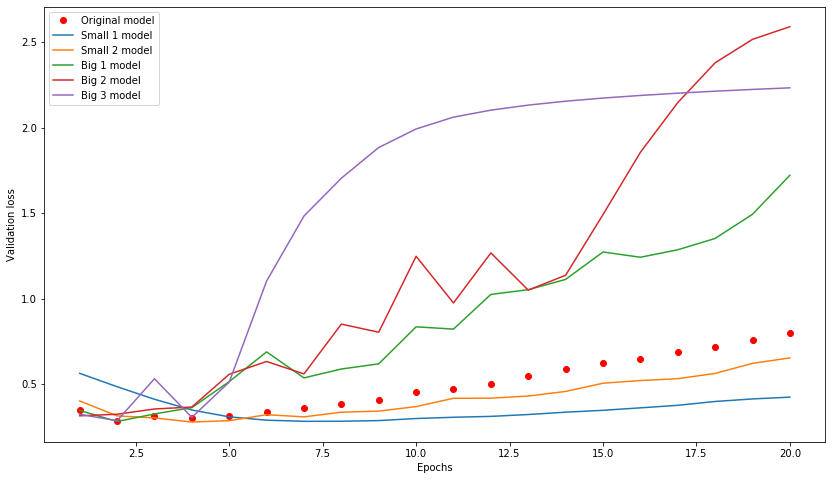

In [32]:

import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss,"ro" , label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, small_1_model_val_loss,  label='Small 1 model')
plt.plot(epochs, small_2_model_val_loss, label='Small 2 model')
plt.plot(epochs, big_1_model_val_loss, label='Big 1 model')
plt.plot(epochs, big_2_model_val_loss, label='Big 2 model')
plt.plot(epochs, big_3_model_val_loss, label='Big 3 model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Here’s a comparison of the validation losses of the original network vs smaller and bigger network. <br>
Keeping in mind that the lower the validation loss the better it is clearer that there is a strong relationship between validation loss and size of the network. <br>
**Validation loss clearly increases with the size of the network** <br>


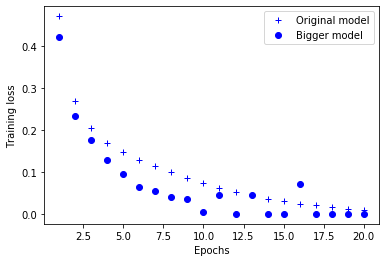

In [34]:

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = big_1_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

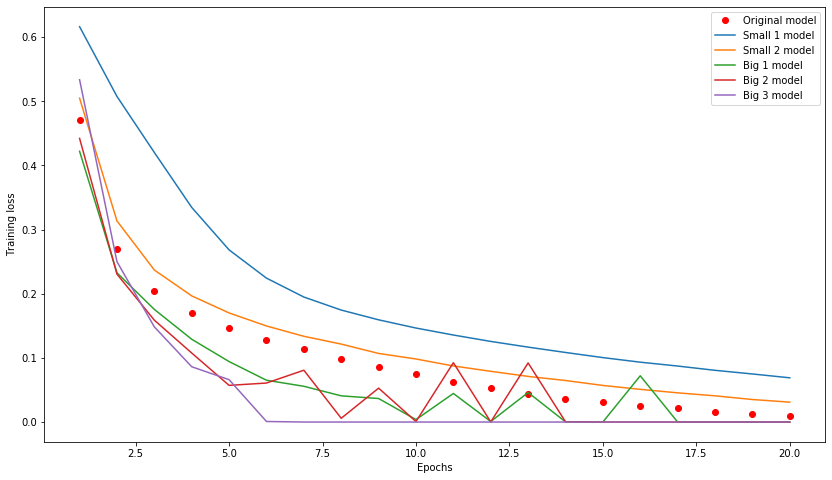

In [37]:
plt.figure(figsize=(14,8))
original_loss = original_hist.history['loss']
small_1_model_loss = small_1_model_hist.history['loss']
small_2_model_loss = small_2_model_hist.history['loss']
big_1_model_loss = big_1_model_hist.history['loss']
big_2_model_loss = big_2_model_hist.history['loss']
big_3_model_loss = big_3_model_hist.history['loss']
plt.plot(epochs, original_loss,"ro" , label='Original model')
plt.plot(epochs, small_1_model_loss,  label='Small 1 model')
plt.plot(epochs, small_2_model_loss, label='Small 2 model')
plt.plot(epochs, big_1_model_loss, label='Big 1 model')
plt.plot(epochs, big_2_model_loss, label='Big 2 model')
plt.plot(epochs, big_3_model_loss, label='Big 3 model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In contrast with validation loss, the bigger the network the quicker training loss reaches zero. <br>
However this also makes overfitting more likely <br>


# Weight Regularization 
Neural networks learn a set of weights that best map inputs to outputs. <br>
IF our network has large weights then small changes in the input can cause large changes in the output. Large weights tend to be a sign of overfitting and we know that if we have overfit our training data then we will likely perform poorly on unseen data aka our test data.<br>

## Solution to Large Weights?
A simple solution is to make the network keep the weights small, this is what is known as **Weight Regularization**<br>
A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small.<br>
This is called weight regularization and it can be used as a general technique to reduce overfitting of the training dataset and improve the generalization of the model.<br>
So the general idea is to penalize the network for having large weights and thus encourging smaller ones.<br>
### L1 regularization
L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); Some coefficients can become zero and eliminated.
###  L2 regularization
L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated). Ridge regression and SVMs use this method.

In Keras, weight regularization is added by passing weight regularizer instances to
layers as keyword arguments.

### Adding L1 and L2 to our model

In [8]:
from keras import regularizers

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [9]:

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [10]:

l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 235us/step - loss: 0.9233 - acc: 0.7741 - val_loss: 0.6607 - val_acc: 0.8468
Epoch 2/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.6319 - acc: 0.8464 - val_loss: 0.6336 - val_acc: 0.8231
Epoch 3/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.5895 - acc: 0.8543 - val_loss: 0.6066 - val_acc: 0.8366
Epoch 4/20
25000/25000 [==============================] - 5s 180us/step - loss: 0.5725 - acc: 0.8564 - val_loss: 0.5656 - val_acc: 0.8590
Epoch 5/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.5553 - acc: 0.8591 - val_loss: 0.5507 - val_acc: 0.8616
Epoch 6/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.5484 - acc: 0.8591 - val_loss: 0.5845 - val_acc: 0.8384
Epoch 7/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.5375 - acc: 0.8643 - val_loss: 0.5318 - 

In [11]:

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [12]:

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [13]:

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 230us/step - loss: 0.5206 - acc: 0.8122 - val_loss: 0.4069 - val_acc: 0.8699
Epoch 2/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.3319 - acc: 0.9026 - val_loss: 0.3445 - val_acc: 0.8870
Epoch 3/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.2820 - acc: 0.9179 - val_loss: 0.3575 - val_acc: 0.8745
Epoch 4/20
25000/25000 [==============================] - 5s 207us/step - loss: 0.2573 - acc: 0.9266 - val_loss: 0.3392 - val_acc: 0.8840
Epoch 5/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2458 - acc: 0.9293 - val_loss: 0.3378 - val_acc: 0.8860
Epoch 6/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2335 - acc: 0.9354 - val_loss: 0.3494 - val_acc: 0.8812
Epoch 7/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.2305 - acc: 0.9382 - val_loss: 0.3825 - 

### L1 vs L2 vs Original Model

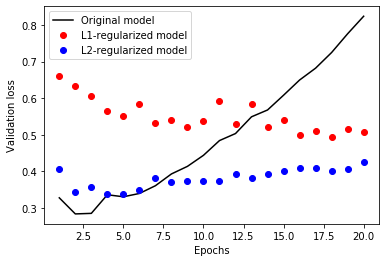

In [18]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
l1_model_val_loss = l1_model_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'black', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'ro', label='L1-regularized model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Here its very clear the regularization models have  become much more
resistant to overfitting than the original model, even though the only difference is the regulariation. 

# Dropout 
Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.
During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

So in dropout a number of layer outputs are dropped out (chosen randomly) during training By dropping a unit out, dropping a unit out simply means temporarily removing it from the network, along with all its incoming and outgoing connections. 

 At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left, incoming and outgoing edges to a dropped-out node are also removed.
 
### Why does dropout work?
A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data. Thus by randoly removing neurons dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

Introducing noise in the output values of a layer can break up patterns that are not significant
which the network would start memorizing if no noise was present.

## Implementing Dropout

We can use dropout as a simple layer in our network <br>
The command: <br>
model.add(layers.Dropout(x)) <br>
Where x is the "dropout rate" is the fraction of the features that are being dropped out. it is usually set between 0.2 and 0.5.

In [20]:

dropout_model= models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [21]:

dropout_model_hist = dropout_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 663us/step - loss: 0.6005 - acc: 0.6646 - val_loss: 0.4620 - val_acc: 0.8604
Epoch 2/20
25000/25000 [==============================] - 11s 437us/step - loss: 0.4457 - acc: 0.8093 - val_loss: 0.3497 - val_acc: 0.8792
Epoch 3/20
25000/25000 [==============================] - 6s 258us/step - loss: 0.3608 - acc: 0.8674 - val_loss: 0.3080 - val_acc: 0.8779
Epoch 4/20
25000/25000 [==============================] - 5s 195us/step - loss: 0.3116 - acc: 0.8939 - val_loss: 0.2868 - val_acc: 0.8837
Epoch 5/20
25000/25000 [==============================] - 4s 170us/step - loss: 0.2725 - acc: 0.9095 - val_loss: 0.2823 - val_acc: 0.8873
Epoch 6/20
25000/25000 [==============================] - 4s 150us/step - loss: 0.2466 - acc: 0.9218 - val_loss: 0.2930 - val_acc: 0.8872
Epoch 7/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2223 - acc: 0.9296 - val_loss: 0.3015 

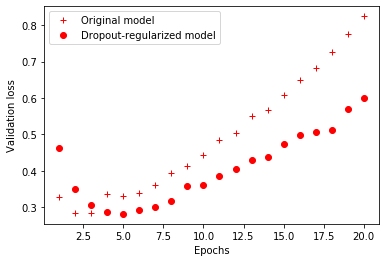

In [22]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'r+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'ro', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Although the dropout model still has an upward trending validation loss it starts overfitting much later than our original model